<a href="https://colab.research.google.com/github/CassioRocha/Dadoscd/blob/master/%5BBioinspiradas%5D_PSO_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0,w=0.5,c1=2.1,c2=2.1):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.fitness_best_i=-1          # best fitness individual
        self.fitness_i=-1               # fitness individual
        self.w = w
        self.c1 = c1 
        self.c2 = c2
        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.fitness_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.fitness_i<self.fitness_best_i or self.fitness_best_i==-1:
            self.pos_best_i=self.position_i
            self.fitness_best_i=self.fitness_i
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w = self.w          # constant inertia weight (how much to weigh the previous velocity)
        c1 = self.c1        # cognitive constant
        c2 = self.c2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update new particle velocity
    def update_velocity_K(self,pos_best_g):
        # w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1 = self.c1  # cognitive constant
        c2 = self.c2  # social constant
        phi = c1 + c2
        K = 2 / ( abs( 2 - phi - (phi**2 - 4 *phi )**0.2 ) )
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=K*(self.velocity_i[i]+vel_cognitive+vel_social)

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]

class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles=50,maxiter=100,w=0.5,c1=2.1,c2=2.1,k=False,g=True):
        global num_dimensions
        self.evaluates = []
        num_dimensions=len(x0)
        fitness_best_g=-1               # best fitness for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            x0_ri = x0.copy()

            for j in range(num_dimensions):
              range_scale = max(bounds[j]) - min(bounds[j])
              scale = random.random()
              x0_ri[j] = min(bounds[j]) + range_scale * scale

            swarm.append(Particle(x0_ri,w=w,c1=c1,c2=c2))

        # begin optimization loop
        i=0
        while i<maxiter:
            # print (i,fitness_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)
                # determine if current particle is the best (globally)
                if swarm[j].fitness_i<fitness_best_g or fitness_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    fitness_best_g=float(swarm[j].fitness_i)
            
            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                if not g:
                  idx1 = (j+1)%num_particles
                  idx2 = j-1
                  if swarm[idx1].fitness_i < swarm[idx2].fitness_i:
                    pos_best_g = swarm[idx1].position_i
                  else:
                    pos_best_g = swarm[idx2].position_i

                if k:
                  swarm[j].update_velocity_K(pos_best_g)                  
                else:
                  swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            self.evaluates.append(fitness_best_g)

    def getEvaluates(self):
        return self.evaluates

In [2]:
def sphere(X):
    return sum([(x**2) for x in X])

def rastrigin(X, A = 10):
    An = A * len(X)
    return An + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

def ackley(X):
  firstSum = 0.0
  secondSum = 0.0
  n = float(len(X))
  for x in X:
    firstSum += x**2.0
    secondSum += math.cos(2.0*math.pi*x)
  return -20.0*math.exp(-0.2*math.sqrt(firstSum/n)) - math.exp(secondSum/n) + 20 + math.e


functions = {
    'sphere': [sphere, [(-5.12,5.12), (-5.12,5.12), (-5.12,5.12)]],
    'rastrigin': [rastrigin, [(-5.12,5.12),(-5.12,5.12),(-5.12,5.12)]],
    'ackley': [ackley, [(-32.768,32.768),(-32.768,32.768),(-32.768,32.768)]]
}


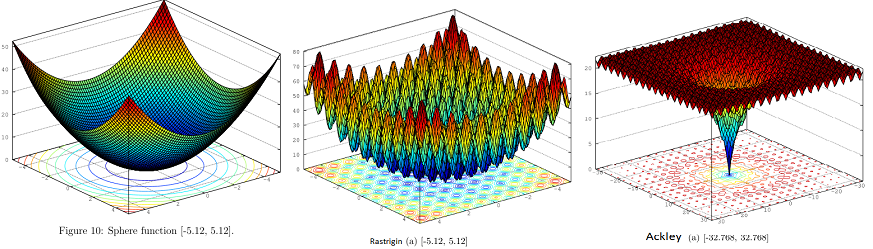

fonte: https://dev.heuristiclab.com/trac.fcgi/wiki/Documentation/Reference/Test%20Functions

# 1) Variar o tamanho do enxame no intervalo [30 - 100] em passos de 10. 
- Mostrar resultado em um gráfico com tamanho do enxame vs. melhor fitness encontrado; 
- Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções.


In [3]:
sizes_fitness = {}

sizessWarm = range(30,101,10)
generations = 100
experiments = 30
sample = 1

for name, function in functions.items():
  sizes_fitness[name] = {}
  for g in range(generations+1):
    if (g+1) % sample == 0:
      sizes_fitness[name][g+1] = {}
  for size in sizessWarm:
    for g in range(generations):
      if (g+1) % sample == 0:
        sizes_fitness[name][g+1][size] = []
    for _ in range(experiments):
      pso = PSO(costFunc=function[0], x0=[0,0,0], bounds=function[1], num_particles=size)
      for g in range(generations):
        sizes_fitness[name][g+1][size].append( pso.getEvaluates()[g] )

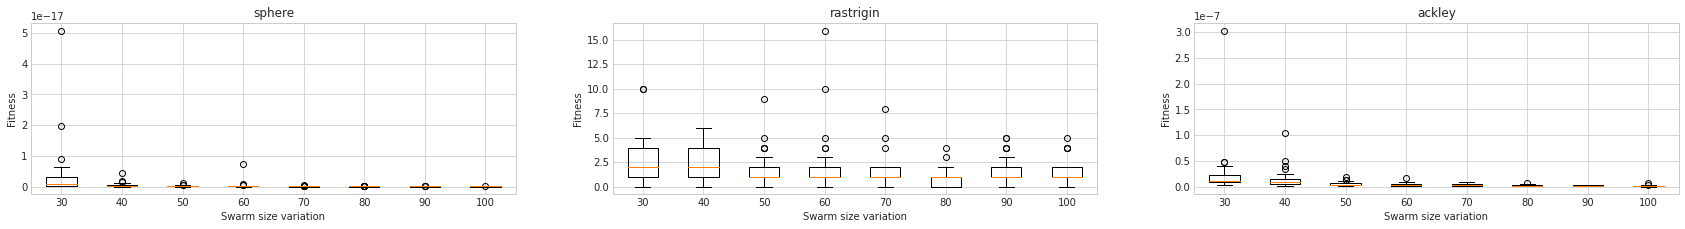

In [5]:

with plt.style.context("seaborn-whitegrid"):    
  fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
for idx,function in enumerate(functions.keys()):
    points = list(sizes_fitness[function][g].keys())
    values = list(sizes_fitness[function][g].values())
    #print(values)
    ax  = axs[idx] 
    ax.set_title(f'{function}')
    ax.boxplot(values)
    size = len(points)
    plt.xticks(list(range(1,size+1)), sizes_fitness[function][g].keys())
    ax.set_xlabel('Swarm size variation')
    ax.set_ylabel('Fitness')
plt.rcParams['figure.figsize'] = [75/2.54, 8/2.54]  
plt.show()

Nesta plotagem a medida que aumenta a quantidade elemento da população o valor médio do fitness tende a melhorar. Com o aumento da quantidade de elementos o processo de exploração tende a encontrar melhores valores. Visto em todas as funções.   




# 2)  Variar o valor de inércia no intervalo [0,1 - 0,9] em passos de 0,1. 
- Mostrar resultado em um gráfico com valor de inércia vs. melhor fitness encontrado;
- Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções.


In [8]:
#--- RUN ----------------------------------------------------------------------+

inertias_fitness = {}
import numpy as np
inertias = np.arange(0.0, 1, 0.1)
generations = 100
experiments = 30
sample = 1

for name, function in functions.items(): 
  inertias_fitness[name] = {}
  for g in range(generations+1):
    if (g+1) % sample == 0:
      inertias_fitness[name][g+1] = {}
  for inertia in inertias:
    for g in range(generations):
      if (g+1) % sample == 0:
        inertias_fitness[name][g+1][inertia] = []
    for _ in range(experiments):
      pso = PSO(costFunc=function[0], x0=[0,0,0], bounds=function[1], w=inertia)
      for g in range(generations):
        inertias_fitness[name][g+1][inertia].append( pso.getEvaluates()[g] )

#--- END ----------------------------------------------------------------------+

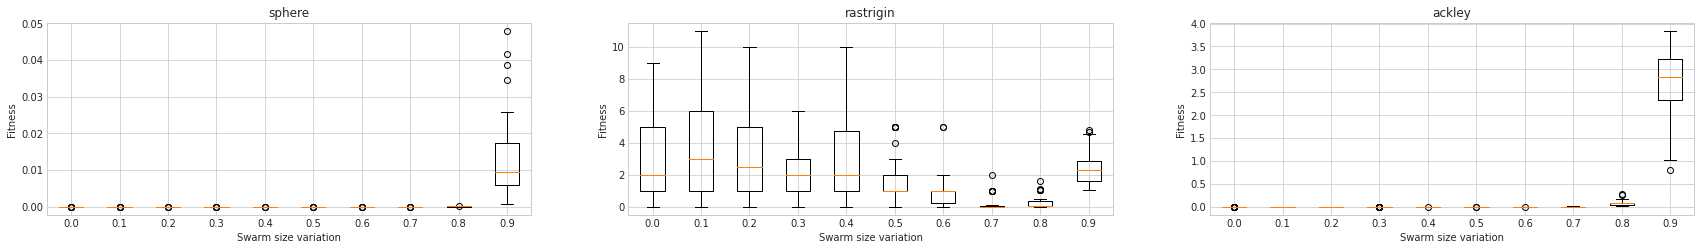

In [9]:

with plt.style.context("seaborn-whitegrid"):    
  fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
for idx,function in enumerate(functions.keys()):
    values = list(inertias_fitness[function][g].values())
    points = [round(num, 1) for num in inertias_fitness[function][g].keys()]
    ax  = axs[idx]
    ax.set_title(f'{function}')
    ax.boxplot(values)
    size = len(points)
    plt.xticks(list(range(1,size+1)),  points)
    ax.set_xlabel('Swarm size variation')
    ax.set_ylabel('Fitness')
    plt.rcParams['figure.figsize'] = [75/2.54, 9/2.54]  
plt.show()

Nas funções mais simples (sphere e ackley) com o valor alto de inércia, o processo de intensificação tende a deteriorar, pois cada particula tem dificuldade de sair de mínimos locais. enquanto, a função rastrigin, que a mais difícil dessas funções, condiciona que as particulas não saiam dos vales.         


# 3)  Variar topologia entre as opções: global e local com 2 vizinhos.
- Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
- Terão duas séries neste gráfico, uma para cada tipo de topologia
- Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).


In [10]:
#--- RUN ----------------------------------------------------------------------+

#--- RUN ----------------------------------------------------------------------+

topology_fitness = {}
import numpy as np

topology = [True, False]
generations = 100
experiments = 30
sample = 1

for name, function in functions.items():
  topology_fitness[name] = {}
  for g in range(generations+1):
    if (g+1) % sample == 0:
     topology_fitness[name][g+1] = {}
  for t in topology:
    for g in range(generations):
      if (g+1) % sample == 0:
        topology_fitness[name][g+1][t] = []
    for _ in range(experiments):
      pso = PSO(costFunc=function[0], x0=[0,0,0], bounds=function[1], g=t)
      for g in range(generations):
        topology_fitness[name][g+1][t].append( pso.getEvaluates()[g] )


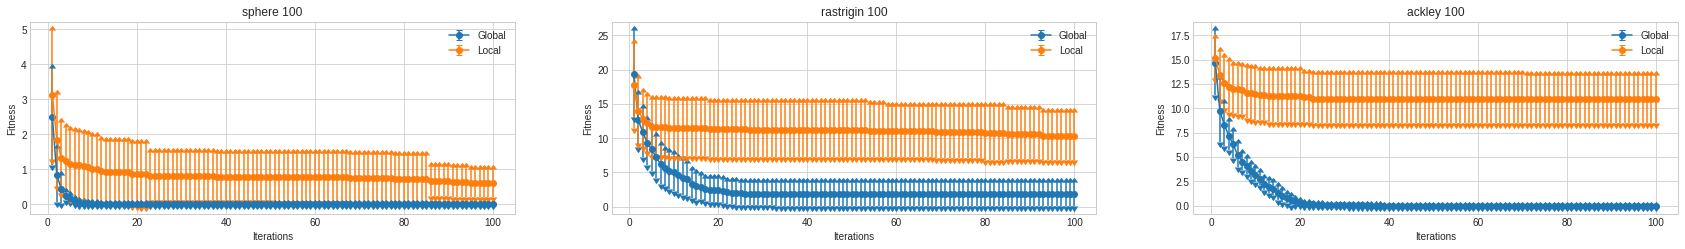

In [11]:
gen = [100]

table = {}
for function in functions.keys():
    table[function] = {}
    for t in topology:
       table[function][t] = {
        "mean" :[],
        "std" :[] 
       }

       for g in range(generations):
          table[function][t]['mean'].append(np.mean(topology_fitness[function][g+1][t]))
          table[function][t]['std'].append(np.std(topology_fitness[function][g+1][t]))

for g1, g in enumerate(gen):
  with plt.style.context("seaborn-whitegrid"):   
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
    for idx,function in enumerate(functions.keys()):
      ax  = axs[idx]
      ax.set_title(f'{function} {g}' )
      for t in topology:
         if t==True: 
            namet = 'Global'
         else:
            namet = 'Local'
         ax.errorbar( list(range(1,generations+1))[0:g], table[function][t]['mean'][0:g], yerr=(table[function][t]['std'][0:g]), fmt='-o', label=namet, uplims=True, lolims=True)
         ax.legend()
         ax.set_xlabel('Iterations')
         ax.set_ylabel('Fitness')
         plt.rcParams['figure.figsize'] = [190/2.54, 180/2.54]  
    #plt.tight_layout()
    plt.show()

Em todas as funções a topologia local com dois vizinhos não conseguiu convergir com 100 interações, já a topologia global convergiu com as funções mais simples(sphere e ackley) e não convergiu com a rastrigin - não chegou próximo ao mínimo global. Porém a topologia global obteve melhores resultados do que a local. já que o processo de intensificação na topologia local foi reduzido, assim indicando que aumentando a quantidade de vizinhos melhore tal topologia.     


# 4) Variar a fórmula de atualização da velocidade entre as opções: tradicional e com fator de restrição.
- Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
-  Terão duas séries neste gráfico
- Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).

In [13]:
#--- RUN ----------------------------------------------------------------------+

velocity_fitness = {}
import numpy as np
velocity = [True, False]
generations = 100
experiments = 30
sample = 1

for name, function in functions.items():
  velocity_fitness[name] = {}
  for g in range(generations+1):
    if (g+1) % sample == 0:
      velocity_fitness[name][g+1] = {}
  for k in velocity:
    for g in range(generations):
      if (g+1) % sample == 0:
        velocity_fitness[name][g+1][k] = []
    for _ in range(experiments):
      pso = PSO(costFunc=function[0], x0=[0,0,0], bounds=function[1], k=k)
      for g in range(generations):
        velocity_fitness[name][g+1][k].append( pso.getEvaluates()[g] )

#--- END ----------------------------------------------------------------------+

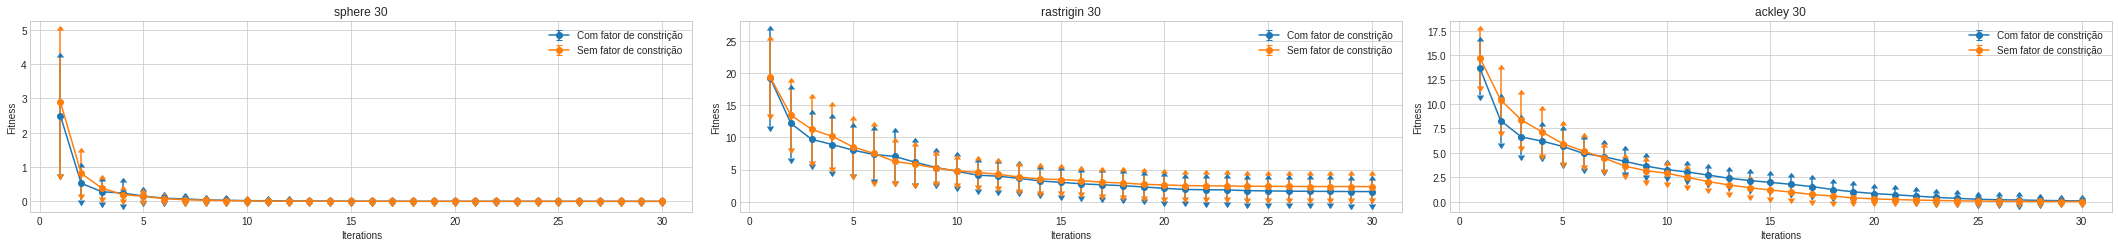

In [14]:
gen = [30 ]

table = {}
for function in functions.keys():
    table[function] = {}
    for k in velocity:
       table[function][k] = {
        "mean" :[],
        "std" :[] 
       }

       for g in range(generations):
          table[function][k]['mean'].append(np.mean(velocity_fitness[function][g+1][k]))
          table[function][k]['std'].append(np.std(velocity_fitness[function][g+1][k]))

for g1, g in enumerate(gen):
  with plt.style.context("seaborn-whitegrid"):   
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
    for idx,function in enumerate(functions.keys()):
      ax  = axs[idx]
      ax.set_title(f'{function} {g}' )
      for k in velocity:
        if k==True: 
            namek = 'Com fator de constrição'
        else:
            namek = 'Sem fator de constrição'
        ax.errorbar( list(range(1,generations+1))[0:g], table[function][k]['mean'][0:g], yerr=(table[function][k]['std'][0:g]), fmt='-o', label=namek, uplims=True, lolims=True)
        ax.legend()
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Fitness')
    plt.rcParams['figure.figsize'] = [19/2.54, 8/2.54]  
    plt.tight_layout()
    plt.show()


Os experimentos com e sem fator de constrição não chegou a resultados significantes, exceto nas primeiras interações a função rastrigin que obteve uma diferença visual. O fator de constrição diminue a exploração ocasionando uma maior intensificação, assim a particula se concentra no vale e não tende a mudar de vale com tanta frequência.  